<a href="https://colab.research.google.com/github/APaulalvarez/Coder---Data-Science-II/blob/main/Data_Wrangling_con_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Wrangling con error

Este fue el primer intento de data wrangling, donde quería probar utilizar ordinal encoder en las variables con categorías con un orden de importancia estabalecido y one hot encoder en la restanto, en vez de get dummies dado que le veia mayor sentido.
No fue el enfoque que usé finalmente porque continuaba dándome error y no logré corregirlo.

Cada encoder (binarizar el target, ordinal y one hot) corren bien independientemente, pero depende cual corro primero, los siguientes daban error.

Es decir, si hacia el ordinal primero no me aparece el error ahi, sino en los pasos subsiguientes. El error era porque se generaban celdas vacias al hacer los encoder.

No pude resolverlo mediante chat con mi tutor, pero dado que fue una prueba lo adjunto aqui de todas maneras porque me gustaría resolver porque ocurría el error.

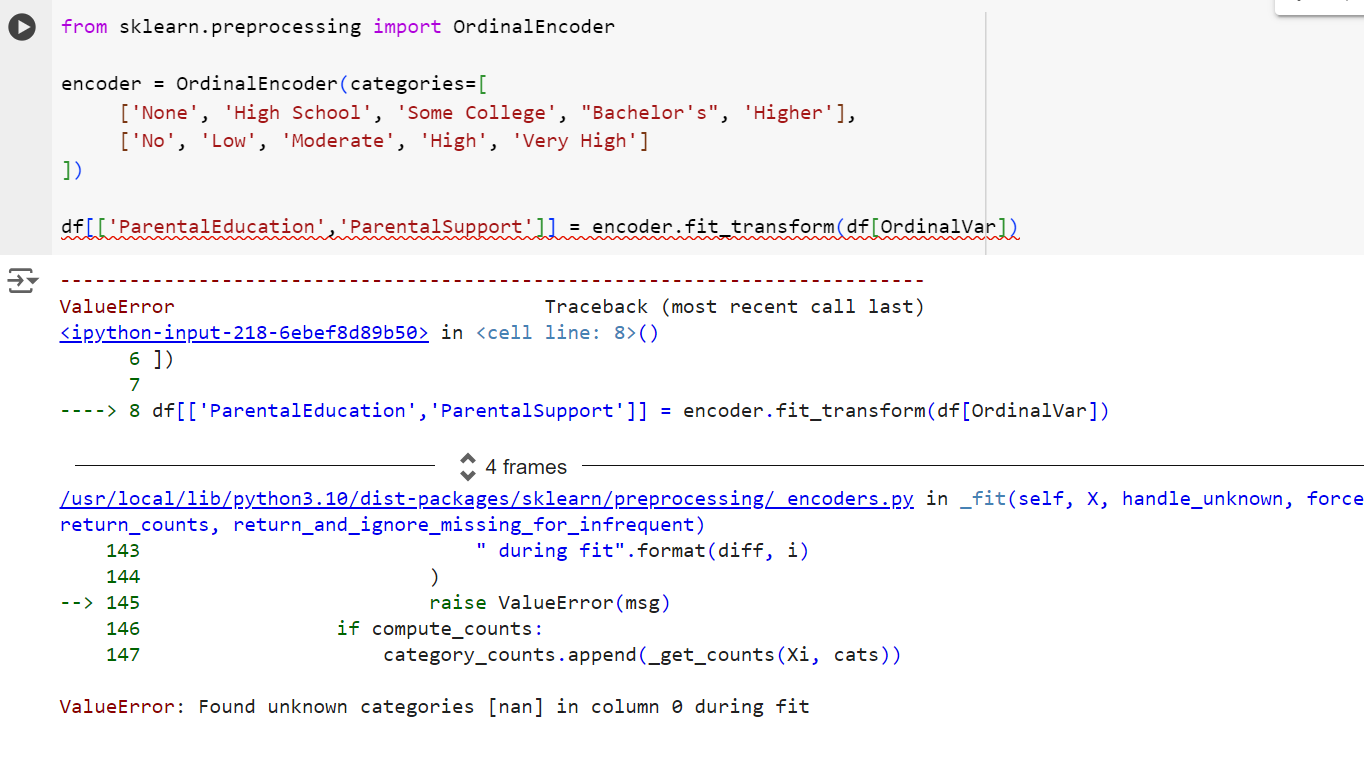

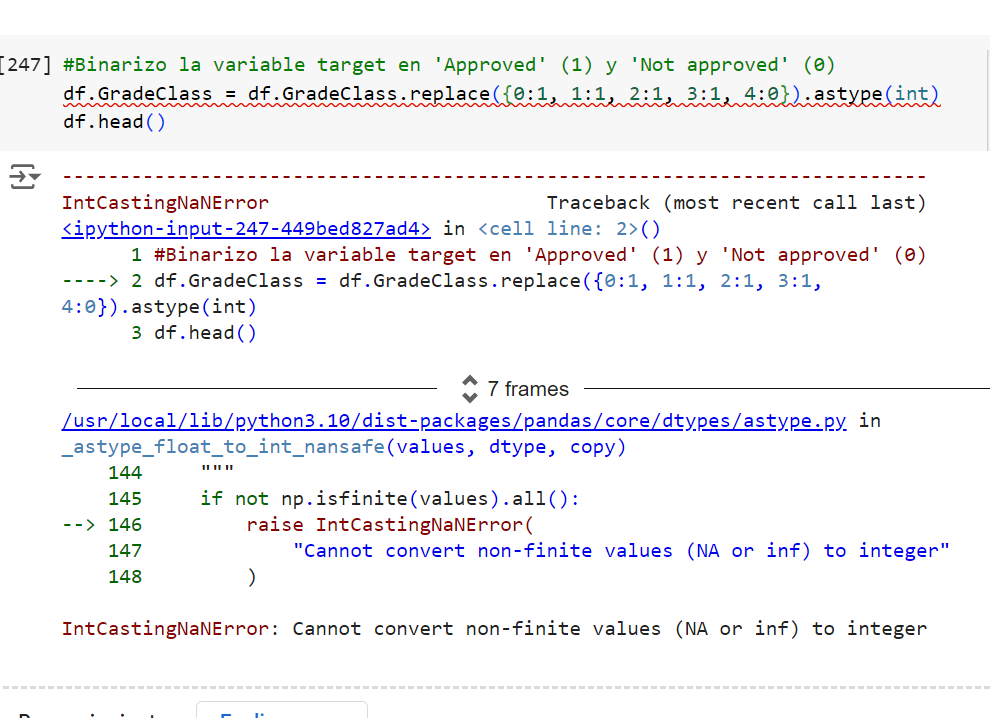

In [ ]:
#Binarizo la variable target en 'Approved' (1) y 'Not approved' (0)
df.GradeClass = df.GradeClass.replace({0:1, 1:1, 2:1, 3:1, 4:0}).astype(int)
df.head()

In [ ]:
df['GradeClass'].value_counts()

Vemos que ambas clases (aprobados y no aprobados) se encuentran balanceadas.

In [ ]:
# Encodeo de el resto de las variables
OrdinalVar = ['ParentalEducation','ParentalSupport']
CatVar = ['Ethnicity']

#Estas no hace falta, ya están así.
BinVar = ['Extracurricular','Sports','Music','Volunteering','Gender','Tutoring',]

In [ ]:
#Onehot Encoder para CatVar
from sklearn.preprocessing import OneHotEncoder

ethnicity_mapping = {
    0: 'Caucasian',
    1: 'African American',
    2: 'Asian',
    3: 'Other'
}

df['Ethnicity'] = df['Ethnicity'].map(ethnicity_mapping)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[CatVar])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(CatVar))
df = pd.concat([df, encoded_df], axis=1)
df.drop('Ethnicity', axis=1, inplace=True)

In [ ]:
#Ordinal Encoder para OrdinalVar
education_mapping = {
    0: 'No',
    1: 'High School',
    2: 'Some College',
    3: 'Bachelor\'s',
    4: 'Higher'
}

support_mapping = {
    0: 'No',
    1: 'Low',
    2: 'Moderate',
    3: 'High',
    4: 'Very High'
}

df['ParentalEducation'] = df['ParentalEducation'].map(education_mapping)
df['ParentalSupport'] = df['ParentalSupport'].map(support_mapping)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[
     ['No', 'High School', 'Some College', "Bachelor's", 'Higher'],
     ['No', 'Low', 'Moderate', 'High', 'Very High']
])

df[['ParentalEducation','ParentalSupport']] = encoder.fit_transform(df[OrdinalVar])

In [ ]:
# Verificar si hay valores faltantes en 'ParentalEducation'
missing_values = df['ParentalEducation'].isnull().sum()
print(f"Valores faltantes en ParentalEducation: {missing_values}")